# <img src="https://m.media-amazon.com/images/W/MEDIAX_792452-T2/images/I/81vOF2Rr2tS.jpg" width="60" />  
# **Prediction of Close Cotation of Bitcoin** 
### First Step : Load The Data 
We Load the Data Base from the API wich contains 1 day inteval cotation of Bitcoin 


### We can visualize the indicators 

#### EMA Indicator : 

In [1]:
from crypto_module import *

- Use the API

In [2]:
symbol = 'BTC/USD'
interval = '1day'
start_date = '2022-01-01 00:00:00'
end_date = '2022-12-31 00:00:00'

In [3]:
data = load_data(symbol, start_date, end_date, interval)
data

,datetime,open,high,low,close
0,2022-01-01,46211.19922,47963.28906,46211.19922,47735.12891
1,2022-01-02,47730.00000,47966.16016,46695.33984,47305.01172
2,2022-01-03,47304.21875,47578.96094,45716.50000,46439.19141
3,2022-01-04,46459.57031,47517.35156,45550.98828,45815.32812
4,2022-01-05,45811.16016,47054.82812,42500.00000,43437.66016
...,...,...,...,...,...
360,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047
361,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039
362,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922
363,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977


- We can verifie if the Data Set is clean

In [4]:
# Checking for any missing (NaN) values in the dataset.
data.isna().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

- There are no Nan Values, load_data() works
- We can verifie if the type of element of the close colone is float to plot it properly

In [5]:
# Extracting the 'close' column from the data DataFrame.
data['close']

0      47735.12891
1      47305.01172
2      46439.19141
3      45815.32812
4      43437.66016
          ...     
360    16697.98047
361    16538.40039
362    16631.19922
363    16602.00977
364    16528.02930
Name: close, Length: 365, dtype: float64

### We can visualize the Data
- We can code two functions for visualizing the Close price and the candels which represent the outcome of the market on the considered interval

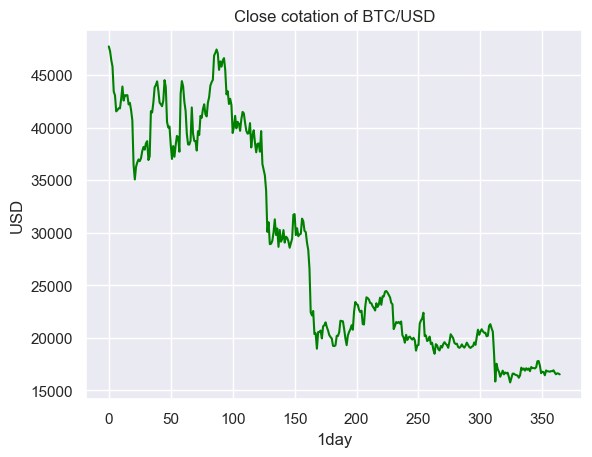

In [6]:
visualize_data(data, symbol, interval)
finance_visualize(data, symbol, interval)

### The Next step is to enrich the Database by adding indicators
- Indicators used are The Relative Strength Index (RSI), The Exponential Moving Average (EMA) and The Average True Range (ATR) 
    - The RSI measures the speed and change of price movements (momentum)
    - The EMA is a movig average that gives more weight to recent price, it seems to be relevent for predicting (trend)
    - The ATR quantifies the volatility (volaltility)

- Those indicators are computed over the 14 last days
  

In [7]:
# Using the 'add_indicators' function to add technical indicators to the data.
final_data = add_indicators(data)
final_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,42581.64844,43462.78906,41766.66016,43090.78125,35.568008,43772.612563,2049.218750
1,2022-01-15,43089.08984,43809.28125,42579.42969,43087.21094,35.548190,43681.225680,1990.692522
2,2022-01-16,43098.19922,43492.07812,42610.44922,43099.76172,35.683860,43603.697152,1911.473692
3,2022-01-17,43104.35156,43199.91016,41568.76172,42216.80078,30.775756,43418.777635,1891.450460
4,2022-01-18,42218.01172,42682.64844,41288.87891,42369.82031,32.508293,43278.916659,1855.901822
...,...,...,...,...,...,...,...,...
347,2022-12-27,16917.19922,16963.83984,16603.13086,16697.98047,44.769321,16866.858029,369.682940
348,2022-12-28,16697.98047,16773.65039,16467.39062,16538.40039,42.154285,16823.063677,365.152714
349,2022-12-29,16538.07031,16653.00000,16482.10938,16631.19922,44.195619,16797.481750,351.276850
350,2022-12-30,16631.19922,16637.72070,16352.41992,16602.00977,43.673548,16771.418819,346.564273


In [8]:
indicator = 'EMA'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### RSI Indicator :

In [9]:
indicator = 'RSI'
visualize_with_indicator(final_data, symbol, interval, indicator)

#### ATR Indicator : 

In [10]:
indicator = 'ATR'
visualize_with_indicator(final_data, symbol, interval, indicator)

# Prediction Model
#### First of all we have to scale the data for the models
- We recall that we want to predict the close price of Bitcoin

In [11]:
# Scaling the final_data for better performance in machine learning models.
scaled_data = scaling_data(final_data)
scaled_data

,datetime,open,high,low,close,RSI,EMA,ATR
0,2022-01-14,0.827927,0.854865,0.803011,0.843492,0.390664,0.945616,0.742401
1,2022-01-15,0.843441,0.865458,0.827859,0.843383,0.390319,0.942433,0.717078
2,2022-01-16,0.843719,0.855761,0.828808,0.843767,0.392680,0.939733,0.682802
3,2022-01-17,0.843907,0.846829,0.796961,0.816773,0.307264,0.933293,0.674138
4,2022-01-18,0.816810,0.831015,0.788405,0.821451,0.337416,0.928423,0.658757
...,...,...,...,...,...,...,...,...
347,2022-12-27,0.043316,0.044742,0.033714,0.036614,0.550794,0.008590,0.015697
348,2022-12-28,0.036614,0.038928,0.029565,0.031735,0.505285,0.007065,0.013737
349,2022-12-29,0.031725,0.035239,0.030015,0.034573,0.540810,0.006174,0.007733
350,2022-12-30,0.034573,0.034772,0.026050,0.033680,0.531725,0.005266,0.005694


## First Model : Linear Regression

- We use linear regression to predict the the considered prediction time, in the following example we predict the price 60 days later 


In [12]:
# Setting up parameters for a prediction model. Here, the goal is to predict the closing price 60 days in the future using the closing price as the regressor.
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

- We apply the simple linear regression and we obtain the following prediction 

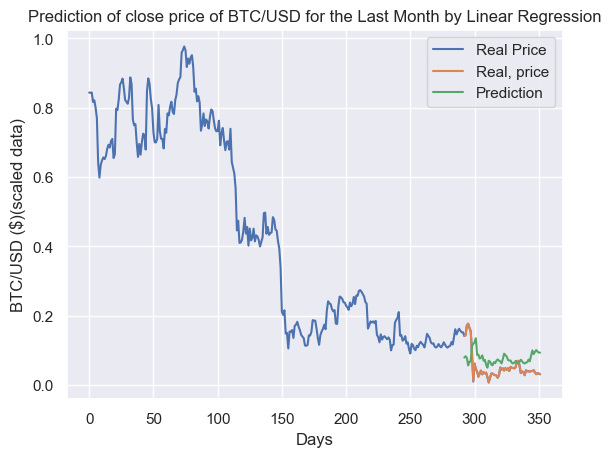

In [13]:
# Applying linear regression to the preprocessed data.
regression_matrix, future_price, simple_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)
# Visualizing the model's performance.
visualize_model(regression_matrix, scaled_data)

- We can zoom the see the prediction better 

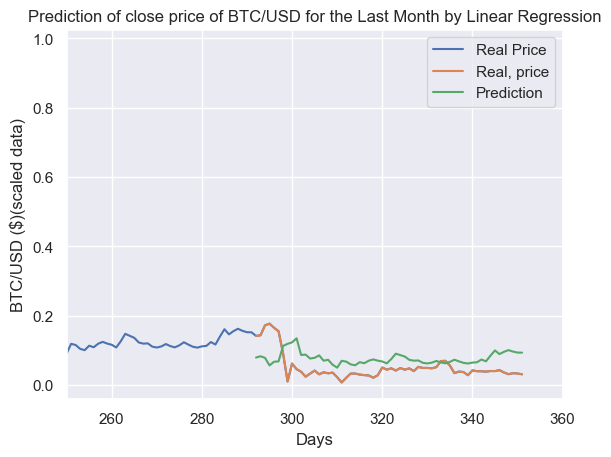

In [14]:
visualize_model(regression_matrix, scaled_data, zoom = [250, 360])

- We have compute the $R^{2}$ indicator to judge the relevance of the model

In [15]:
# Displaying the R-squared value of the linear regression model.
simple_r2

0.5465707160238085

- The $R^{2}$ shows that the linear regression is not that much adapted for time series like the close price 
- We can see in the plot that the simple linear regression cannot predict abrupt movement of the price, which is expected 
#### For the next step we can visualize the prediction of the next 60 days, which correspond to the first two months of 2023

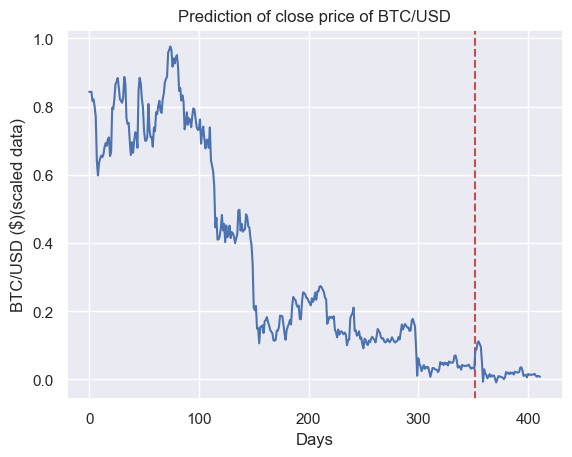

In [16]:
# Visualizing future price predictions made by the model.
visualize_future(scaled_data, future_price)

#### We can also try the multiple linear regression
#### First of all, we analyse de Correlation Matrix to see the correlation between variables

<function matplotlib.pyplot.show(close=None, block=None)>

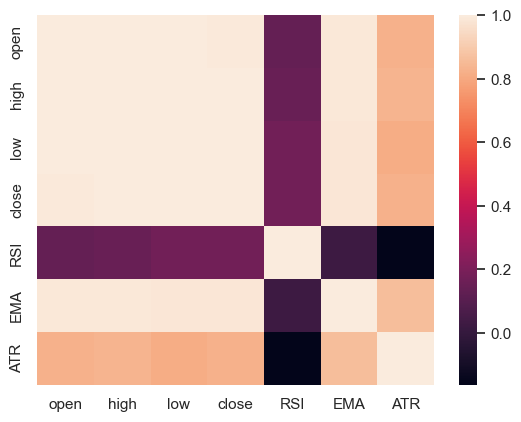

In [17]:
# Creating a correlation matrix from the final_data.
corr_matrix = final_data.drop('datetime', axis=1).corr()
# A heatmap is then plotted using seaborn to visually represent the correlations.
sns.heatmap(corr_matrix)
plt.show

- We can check the values to have antother point of view 

In [18]:
# Extracting the correlation values of all features with respect to the 'close' column from the correlation matrix.
corr_matrix['close']

open     0.994927
high     0.997539
low      0.997530
close    1.000000
RSI      0.173826
EMA      0.985783
ATR      0.825791
Name: close, dtype: float64

- It seems that the Close Price is relativelly high correlated with the EMA and ATR indicators, we can add them to the Regressos 
#### Apply multiple Linear Rgression

In [19]:
# Updating the list of regressors to include 'close', 'ATR', and 'EMA' for the data preprocessing step.
regressor = ['close', 'ATR', 'EMA']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [20]:
# Applying linear regression with the updated set of regressors.
regression_matrix, future_price, mult_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

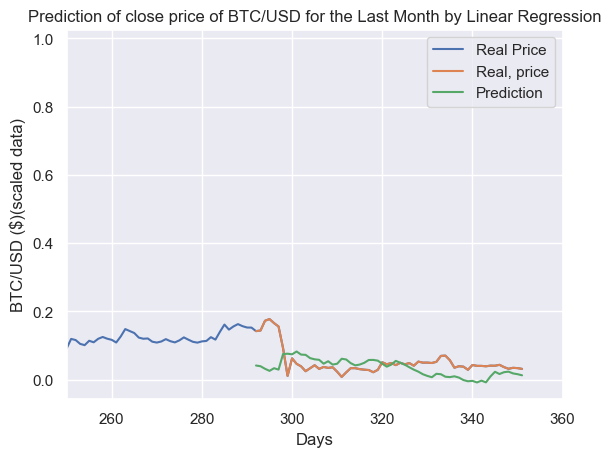

In [21]:
# Visualizing the performance of the linear regression model.
visualize_model(regression_matrix, scaled_data, zoom=[250, 360])

- We can compare the $R^{2}$ of the two methods 
- Likewise, we see above that the multiple linear regression cannot predict properly the continuity of the price jsute befor day 300. Moreover the prediction diverges between $[\, 300, 340\,]$

In [22]:
# Displaying the R-squared values for both the multivariate model ('mult_r2') and the previous simple model ('simple_r2').
mult_r2, simple_r2

(0.5688357905513927, 0.5465707160238085)

- The $R^{2}_{mult} > R^{2}_{simple}$, but the prediction is not better, $R^{2}$ increses just beacuse we have added regressors
- We can also plot the prediction of the first two months of 2023

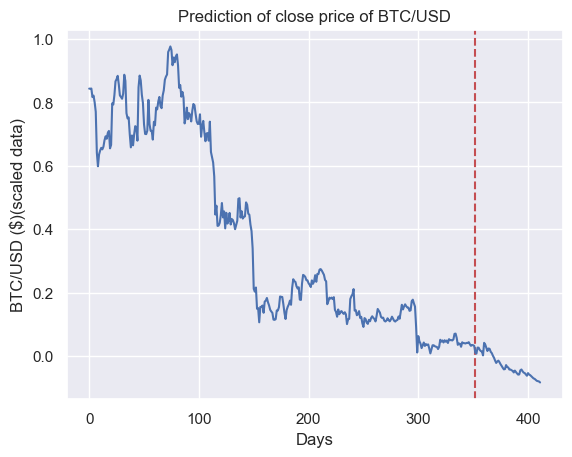

In [23]:
visualize_future(scaled_data, future_price)

- We notice that the two predictions of the models are different and the multimple linear regression gives negative close price which is a problem in our case beacause we use the $\texttt{MinMaxScaler}$
#### Conclusion : 
The linear regression ase we expected is not adapted to this kind of prediction, time series are more challenging to predict so in the next part we will try another type of regression more sophisticated 

## Second Model : Suport Vector Regression 
- the first step is to find the best parameters of the SVR model, we proceed by Cross Validationwith the function $\texttt{cross\_validation\_parameter}$

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
# Creating a parameter grid for hyperparameter tuning. This grid includes a range of values for 'C' and 'gamma', which are parameters used in models like SVMs.
param_grid = {'C': [10**i for i in range(2, 11)], 
              'gamma' : [10**(-i) for i in range(2, 11)]} # Creat a dictionnary of parameters

In [26]:
# Splitting the price and target data into training and test sets, with 70% of data as training set.
price_train, _, target_train, _ = train_test_split(price, target, test_size = 0.3)
# The 'cross_validation_parameter' function is then used to find the best 'C' and 'gamma' values for a model, likely through a grid search approach.
best_C, best_gamma = cross_validation_parameter(param_grid, price_train, target_train)

In [27]:
print(f'The best values are {best_C} for C and {best_gamma} for Gamma')

The best values are 100000 for C and 0.01 for Gamma


- We apply the SVR mathod with function $\texttt{apply\_svr}$


In [28]:
# Applying a Support Vector Regression (SVR) model with the best 'C' and 'gamma' values found. 
svr_matrix, future_price, accuracy_score = apply_svr(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma)

- We can visualize the prediction between $[\, 280, 350\, ]$ days 

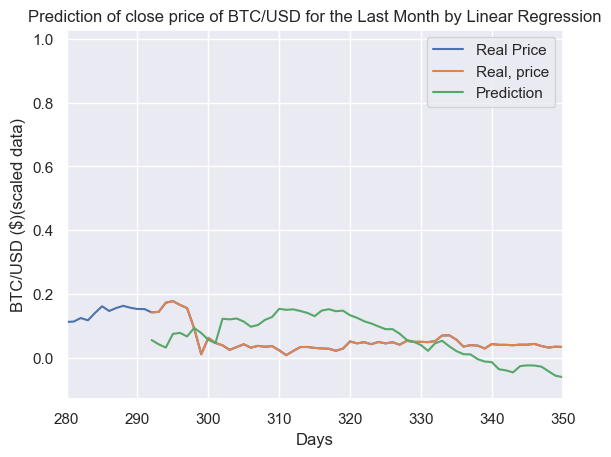

In [29]:
# Visualizing the SVR model's performance.
visualize_model(svr_matrix, scaled_data, zoom = [280, 350])

- Visually it seems that the SVR model fit better than the Linear Regression but it's far from what we want, peaks and drops are not dredicted, for example beteween $[\, 290, 300\, ]$ the drop is predicted earlier.
- We can cehck the accuracy score 

In [30]:
# Displaying the accuracy score of the SVR model.
accuracy_score

0.6868337430057208

- This value is the share of the test data which are correctly predicted 
We can also show the prediction for the two first months of 2023

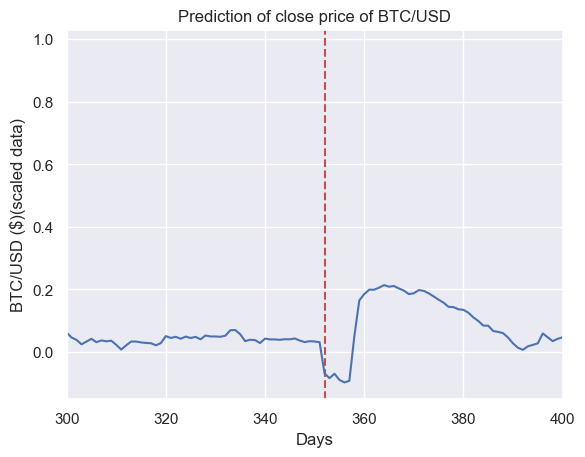

In [31]:
visualize_future(scaled_data, future_price, zoom=[300, 400])

- The prediction diverges to negative value taht we do not accept

#### Conclusion : 
The three methods that we have presented give prediction that cannot be adapted to financial time series. We have to go in depth in specific learning models for time series especially methods with deep learning. 


#### Long short-term memory Model (LSTM)
- The LSTM model is a Deep Leraning model which can be used to predict time series data 

In [32]:
# Setting the sequence length for time series prediction.
sequence_length = 20 

In [33]:
# Creating sequences from the scaled data using the specified sequence length.
X, y = create_sequences(scaled_data, sequence_length) # Prediction based on 10 periods (10 days or 10 hours) 
# The 'lstm_model' function trains the LSTM on these sequences and makes predictions.
y_train, y_test, predicted_values = lstm_model(X, y)



Epoch 1/100

1/1 [==============================] - 4s 4s/step - loss: 0.2117
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.1411
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0880
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0436
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0205
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0163
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 0.0341
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0422
Epoch 9/100
1/1 [==============================] - 0s 47ms/step - loss: 0.0441
Epoch 10/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0350
Epoch 11/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0224
Epoch 12/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0139
Epoch 13/100
1/1 [==============================

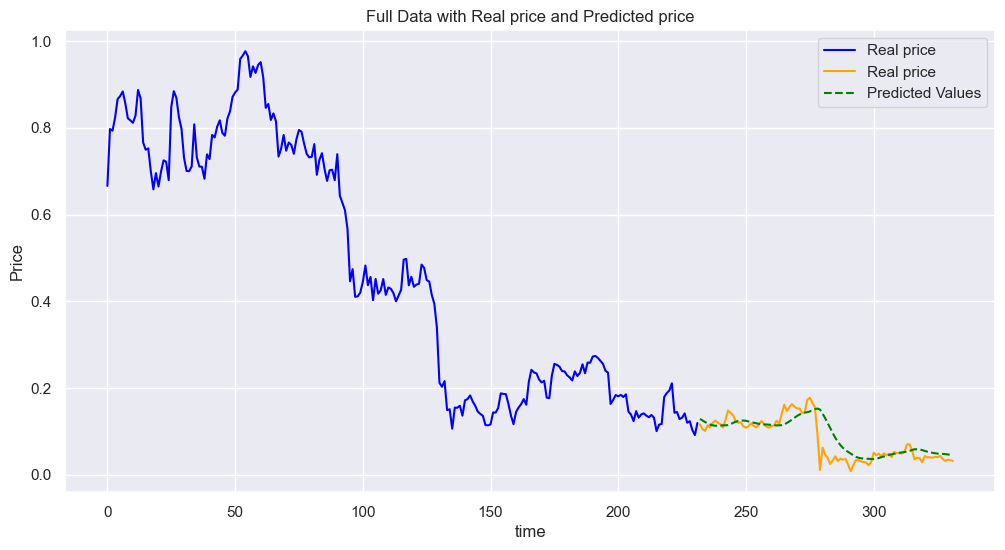

In [34]:
visualize_RNN_prediction(y_train, y_test, predicted_values)

- The prediction fits the close price pretty well and we can notice thaht the prediction smooths the variation but keeps the major drops and peaks

### To have more data we can use LSTM for day trading data prediction 
- The interval we choose is 1 hour

In [35]:
# Re-defining the symbol, interval, and date range for loading data, this time focusing on hourly data ('1h' interval) for Bitcoin.
symbol = 'BTC/USD'
interval = '1h'
start_date = '2022-01-01 00:00:00'
end_date = '2023-03-31 00:00:00'
hour_data = load_data(symbol, start_date, end_date, interval)
hour_btc = scaling_data(hour_data)

In [36]:
# Displaying the scaled hourly Bitcoin data.
hour_btc

,datetime,open,high,low,close
0,2022-09-02 00:00:00,0.338517,0.339190,0.332757,0.334382
1,2022-09-02 01:00:00,0.334501,0.335579,0.330080,0.332241
2,2022-09-02 02:00:00,0.332274,0.334883,0.326095,0.331118
3,2022-09-02 03:00:00,0.331162,0.346200,0.331029,0.340692
4,2022-09-02 04:00:00,0.340540,0.349775,0.339578,0.341127
...,...,...,...,...,...
4995,2023-03-30 20:00:00,0.912242,0.926948,0.908161,0.926276
4996,2023-03-30 21:00:00,0.925946,0.928311,0.916700,0.922357
4997,2023-03-30 22:00:00,0.920749,0.925310,0.903158,0.907973
4998,2023-03-30 23:00:00,0.908443,0.918289,0.903705,0.917038


- We can show the prediction on this DataSet we expect a better prediction than the previous exemple because we provide more data

Epoch 1/100
10/10 [==============================] - 4s 48ms/step - loss: 0.0248
Epoch 2/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0059
Epoch 3/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0034
Epoch 4/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0018
Epoch 5/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0013
Epoch 6/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0012
Epoch 7/100
10/10 [==============================] - 1s 54ms/step - loss: 0.0011
Epoch 8/100
10/10 [==============================] - 1s 53ms/step - loss: 0.0010
Epoch 9/100
10/10 [==============================] - 1s 53ms/step - loss: 9.6064e-04
Epoch 10/100
10/10 [==============================] - 1s 53ms/step - loss: 9.7602e-04
Epoch 11/100
10/10 [==============================] - 1s 54ms/step - loss: 8.4378e-04
Epoch 12/100
10/10 [==============================] - 1s 53ms/step - loss: 9.0471e-04
Epoch 13/

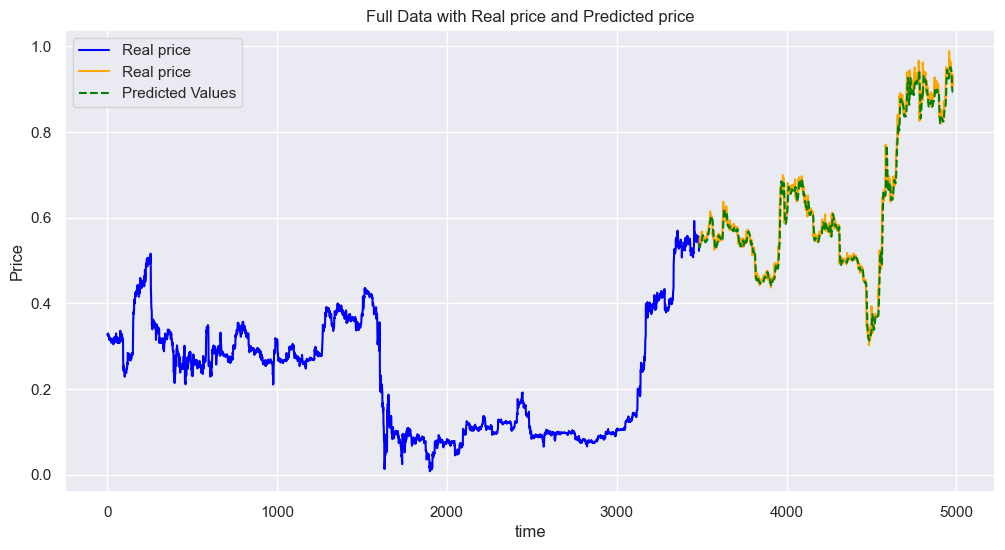

In [37]:
# Setting the sequence length for LSTM model, creating sequences from the hourly data, and applying the LSTM model to this data.
sequence_length = 20
X, y = create_sequences(hour_btc, sequence_length) # Prediction based on 10 periods (10 days or 10 hours) 
y_train, y_test, predicted_values = lstm_model(X, y)
visualize_RNN_prediction(y_train, y_test, predicted_values)

In [38]:
# Implementing a recursive prediction method.
t = 5
prediction = recursive_prediction(X, y, t)

Epoch 1/100
15/15 [==============================] - 5s 54ms/step - loss: 0.0305
Epoch 2/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0075
Epoch 3/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0031
Epoch 4/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0024
Epoch 5/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0021
Epoch 6/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0019
Epoch 7/100
15/15 [==============================] - 1s 57ms/step - loss: 0.0017
Epoch 8/100
15/15 [==============================] - 1s 54ms/step - loss: 0.0017
Epoch 9/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0016
Epoch 10/100
15/15 [==============================] - 1s 53ms/step - loss: 0.0015
Epoch 11/100
15/15 [==============================] - 1s 53ms/step - loss: 0.0014
Epoch 12/100
15/15 [==============================] - 1s 52ms/step - loss: 0.0014
Epoch 13/100
15/15 [=====

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


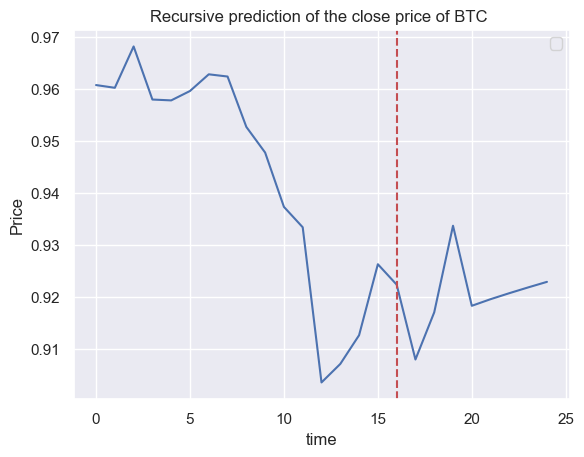

In [39]:
# Plotting the results of the recursive prediction.
# The red dashed line at 'sequence_length - t + 1' indicates the point in the time series where the recursive prediction begins.
plt.plot(prediction)
plt.title('Recursive prediction of the close price of BTC ')
plt.axvline(x = sequence_length-t+1, color = 'r', linestyle = '--')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend()
plt.show()